# Convolutional Network Architectures
Name 1: Jadon Swearingen (5000)
Name 2: Ephraim Sun (7000)
Name 3: Adeeb Abdul Taher    (7000)

### Dataset Selection



In [43]:
import keras
import os
import struct
import numpy as np
import tensorflow as tf
# from sklearn.preprocessing import RobustScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, MaxPooling2D, Conv2D, Dense, Flatten, Activation

In [44]:
# import cv2
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from keras.utils import to_categorical


# def load_dataset(path):
#     images = []
#     labels = []
#     label_classes = os.listdir(path)
#     for label in label_classes:
#         img_names = os.listdir(os.path.join(path, label))
#         for img_name in img_names:
#             img = cv2.imread(os.path.join(path, label, img_name), cv2.IMREAD_GRAYSCALE)
#             img = cv2.resize(img, (28, 28))
#             images.append(img)
#             labels.append(label)
#     images = np.array(images)
#     labels = np.array(labels)
#     return train_test_split(images, labels, test_size=0.2, random_state=42)

# X_train, X_test, y_train, y_test = load_dataset('1000pc_parts')

# # Normalize the images.
# X_train = X_train.reshape(X_train.shape[0], 28, 28, 1) / 255.0 - 0.5
# X_test = X_test.reshape(X_test.shape[0], 28, 28, 1) / 255.0 - 0.5

# # Use LabelEncoder to encode labels into integers
# le = LabelEncoder()
# y_train = le.fit_transform(y_train)
# y_test = le.transform(y_test)

# # Number of classes
# NUM_CLASSES = len(np.unique(y_train))

# # One-hot encode the labels
# y_train_ohe = to_categorical(y_train, NUM_CLASSES)
# y_test_ohe = to_categorical(y_test, NUM_CLASSES)

### __TODO__ Argue FOR StratifiedKFold

In [45]:
import cv2
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

def load_dataset(path):
    images = []
    labels = []
    label_classes = os.listdir(path)
    for label in label_classes:
        img_names = os.listdir(os.path.join(path, label))
        for img_name in img_names:
            img = cv2.imread(os.path.join(path, label, img_name), cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (28, 28))
            images.append(img)
            labels.append(label)
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

X, y = load_dataset('1000pc_parts')

# Normalize the images.
X = X.reshape(X.shape[0], 28, 28, 1) / 255.0 - 0.5

# Use LabelEncoder to encode labels into integers
le = LabelEncoder()
y = le.fit_transform(y)

# Number of classes
NUM_CLASSES = len(np.unique(y))

# One-hot encode the labels
y_ohe = to_categorical(y, NUM_CLASSES)

# Stratified 10-fold cross-validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
#use this for training the thing
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_ohe[train_index], y_ohe[test_index]
    # Now you can train your model on X_train, y_train and validate it on X_test, y_test

In [46]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Set the path to the dataset directory
# dataset_dir = '1000pc_parts'

# # Define the parameters for data augmentation and preprocessing
# datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     validation_split=0.2
# )

# # Load the dataset using the ImageDataGenerator
# train_generator = datagen.flow_from_directory(
#     dataset_dir,
#     target_size=(224, 224),
#     batch_size=950,
#     class_mode='categorical',
#     subset='training'
# )

# validation_generator = datagen.flow_from_directory(
#     dataset_dir,
#     target_size=(224, 224),
#     batch_size=233,
#     class_mode='categorical',
#     subset='validation'
# )

# NUM_CLASSES = 8

# X_train, _ = next(train_generator)
# X_test, _ = next(validation_generator)
# y_train = train_generator.classes
# y_test = validation_generator.classes
# # make one- hot encoded versions of the data
# y_train_ohe = keras.utils.to_categorical(y_train, NUM_CLASSES)
# y_test_ohe = keras.utils.to_categorical(y_test, NUM_CLASSES)

In [47]:
print('X_train shape:', X_train.shape) 
print('X_test shape:', X_test.shape)

print('y_train shape:', y_train.shape) 
print('y_test shape:', y_test.shape)

X_train shape: (2952, 28, 28, 1)
X_test shape: (327, 28, 28, 1)
y_train shape: (2952, 14)
y_test shape: (327, 14)


In [48]:
# # %%time
# from tensorflow.keras.metrics import Precision, Recall, AUC


# # make a keras MLP
# mlp = Sequential()
# mlp.add( Flatten() )
# mlp.add( Dense(input_dim=1, units=100, activation='relu') )
# mlp.add( Dense(units=50, activation='relu') )
# mlp.add( Dense(units=50, activation='relu') )
# mlp.add( Dense(NUM_CLASSES) )
# mlp.add( Activation('softmax') )

# mlp.compile(loss='categorical_crossentropy',
#               optimizer='rmsprop',
#               metrics=['accuracy', Precision(), Recall(), AUC()])

# input_shape = [None, 28,28,1]
# mlp.build(input_shape)
# print(mlp.summary())

# mlp.fit(X_train, y_train_ohe, 
#         batch_size=32, epochs=3, 
#         shuffle=True, verbose=1)

In [49]:
# %%time
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Activation

# Stratified 10-fold cross-validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_ohe[train_index], y_ohe[test_index]

    # make a keras MLP
    mlp = Sequential()
    mlp.add(Flatten())
    mlp.add(Dense(input_dim=1, units=100, activation='relu'))
    mlp.add(Dense(units=50, activation='relu'))
    mlp.add(Dense(units=50, activation='relu'))
    mlp.add(Dense(NUM_CLASSES))
    mlp.add(Activation('softmax'))

    mlp.compile(loss='categorical_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy', Precision(), Recall(), AUC()])

    input_shape = [None, 28, 28, 1]
    mlp.build(input_shape)
    print(mlp.summary())

    mlp.fit(X_train, y_train, 
            batch_size=32, epochs=3, 
            shuffle=True, verbose=1)

c:\Users\jadon\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 14)             │           714 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 14)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 86,814 (339.12 KB)

 Trainable params: 86,814 (339.12 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/3
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1142 - auc_1: 0.5745 - loss: 2.6102 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
Epoch 2/3
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2176 - auc_1: 0.6917 - loss: 2.4187 - precision_1: 0.7144 - recall_1: 0.0013       
Epoch 3/3
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2673 - auc_1: 0.7481 - loss: 2.2640 - precision_1: 0.7736 - recall_1: 0.0198


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 14)             │           714 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 14)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 86,814 (339.12 KB)

 Trainable params: 86,814 (339.12 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/3
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1160 - auc_2: 0.5836 - loss: 2.5949 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00      
Epoch 2/3
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2084 - auc_2: 0.7072 - loss: 2.3907 - precision_2: 0.3025 - recall_2: 0.0023       
Epoch 3/3
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2570 - auc_2: 0.7493 - loss: 2.2637 - precision_2: 0.7565 - recall_2: 0.0192       


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 14)             │           714 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 14)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 86,814 (339.12 KB)

 Trainable params: 86,814 (339.12 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/3
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1115 - auc_3: 0.5911 - loss: 2.5907 - precision_3: 0.0638 - recall_3: 2.1906e-05    
Epoch 2/3
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2229 - auc_3: 0.7146 - loss: 2.3624 - precision_3: 0.5495 - recall_3: 0.0041       
Epoch 3/3
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2734 - auc_3: 0.7585 - loss: 2.2358 - precision_3: 0.7847 - recall_3: 0.0198       


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 14)             │           714 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 14)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 86,814 (339.12 KB)

 Trainable params: 86,814 (339.12 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/3
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1289 - auc_4: 0.5897 - loss: 2.5873 - precision_4: 0.1631 - recall_4: 2.0841e-04   
Epoch 2/3
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2151 - auc_4: 0.7033 - loss: 2.3927 - precision_4: 0.6531 - recall_4: 0.0068      
Epoch 3/3
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2531 - auc_4: 0.7486 - loss: 2.2720 - precision_4: 0.6919 - recall_4: 0.0242


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_12 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 14)             │           714 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 14)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 86,814 (339.12 KB)

 Trainable params: 86,814 (339.12 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/3
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1225 - auc_5: 0.5788 - loss: 2.5960 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00
Epoch 2/3
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2222 - auc_5: 0.7062 - loss: 2.3887 - precision_5: 0.4984 - recall_5: 0.0062      
Epoch 3/3
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2805 - auc_5: 0.7529 - loss: 2.2418 - precision_5: 0.7293 - recall_5: 0.0334     


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_13 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 14)             │           714 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 14)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 86,814 (339.12 KB)

 Trainable params: 86,814 (339.12 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/3
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1254 - auc_6: 0.5893 - loss: 2.5901 - precision_6: 0.0000e+00 - recall_6: 0.0000e+00
Epoch 2/3
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1967 - auc_6: 0.7016 - loss: 2.4121 - precision_6: 0.4883 - recall_6: 0.0015     
Epoch 3/3
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2596 - auc_6: 0.7513 - loss: 2.2615 - precision_6: 0.6887 - recall_6: 0.0213


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_14 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 14)             │           714 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 14)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 86,814 (339.12 KB)

 Trainable params: 86,814 (339.12 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/3
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1227 - auc_7: 0.5767 - loss: 2.6001 - precision_7: 0.0000e+00 - recall_7: 0.0000e+00
Epoch 2/3
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2072 - auc_7: 0.7052 - loss: 2.3885 - precision_7: 0.6207 - recall_7: 0.0020      
Epoch 3/3
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2709 - auc_7: 0.7453 - loss: 2.2731 - precision_7: 0.7604 - recall_7: 0.0219


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_15 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 14)             │           714 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 14)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 86,814 (339.12 KB)

 Trainable params: 86,814 (339.12 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/3
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1302 - auc_8: 0.5829 - loss: 2.5991 - precision_8: 0.2057 - recall_8: 1.4835e-04   
Epoch 2/3
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2286 - auc_8: 0.7023 - loss: 2.3888 - precision_8: 0.9441 - recall_8: 0.0062      
Epoch 3/3
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2540 - auc_8: 0.7415 - loss: 2.2903 - precision_8: 0.8648 - recall_8: 0.0220


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_16 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 14)             │           714 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 14)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 86,814 (339.12 KB)

 Trainable params: 86,814 (339.12 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/3
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1133 - auc_9: 0.5848 - loss: 2.5910 - precision_9: 0.1638 - recall_9: 3.4260e-04   
Epoch 2/3
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1863 - auc_9: 0.6918 - loss: 2.4245 - precision_9: 0.4609 - recall_9: 0.0029       
Epoch 3/3
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2494 - auc_9: 0.7367 - loss: 2.2946 - precision_9: 0.8382 - recall_9: 0.0189


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_17 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 14)             │           714 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 14)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 86,814 (339.12 KB)

 Trainable params: 86,814 (339.12 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/3
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1223 - auc_10: 0.5871 - loss: 2.5930 - precision_10: 0.0000e+00 - recall_10: 0.0000e+00
Epoch 2/3
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2066 - auc_10: 0.7022 - loss: 2.4003 - precision_10: 0.8159 - recall_10: 0.0054
Epoch 3/3
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2525 - auc_10: 0.7294 - loss: 2.3155 - precision_10: 0.8475 - recall_10: 0.0163


In [50]:
from sklearn import metrics as mt
from matplotlib import pyplot as plt
import seaborn as sns
# %matplotlib inline

def compare_mlp_cnn(cnn, mlp, X_test, y_test, labels='auto'):
    plt.figure(figsize=(15,5))
    if cnn is not None:
        yhat_cnn = np.argmax(cnn.predict(X_test), axis=1)
        acc_cnn = mt.accuracy_score(y_test,yhat_cnn)
        plt.subplot(1,2,1)
        cm = mt.confusion_matrix(y_test,yhat_cnn)
        cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
        sns.heatmap(cm, annot=True, fmt='.2f',xticklabels=labels,yticklabels=labels)
        plt.title(f'CNN: {acc_cnn:.4f}')
    
    if mlp is not None:
        yhat_mlp = np.argmax(mlp.predict(X_test), axis=1)
        acc_mlp = mt.accuracy_score(y_test,yhat_mlp)
        plt.subplot(1,2,2)
        cm = mt.confusion_matrix(y_test,yhat_mlp)
        cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
        sns.heatmap(cm,annot=True, fmt='.2f',xticklabels=labels,yticklabels=labels)
        plt.title(f'MLP: {acc_mlp:.4f}')

In [51]:
labels = [
    "speakers",
    "webcam",
    "mouse",
    "keyboard",
    "microphone",
    "headset",
    "cpu",
    "gpu",
]
compare_mlp_cnn(None,mlp,X_test,y_test,labels)


 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

<Figure size 1500x500 with 0 Axes>

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 24)     │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 28, 28, 24)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 24)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 24)     │         5,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 14, 14, 24)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 24)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1176)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 100)            │       117,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 14)             │         1,414 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,662 (526.02 KB)

 Trainable params: 134,662 (526.02 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0966 - loss: 0.0662 - val_accuracy: 0.1357 - val_loss: 0.0659
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1219 - loss: 0.0657 - val_accuracy: 0.1494 - val_loss: 0.0655
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1421 - loss: 0.0655 - val_accuracy: 0.1677 - val_loss: 0.0650
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1730 - loss: 0.0648 - val_accuracy: 0.1875 - val_loss: 0.0643
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1885 - loss: 0.0641 - val_accuracy: 0.1905 - val_loss: 0.0640
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1994 - loss: 0.0636 - val_accuracy: 0.2104 - val_loss: 0.0633
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2240 - loss: 0.0630 - val_accuracy: 0.2348 - val_loss: 0.0624
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2473 - loss: 0.0622 - val_accuracy: 0.2317 - val_

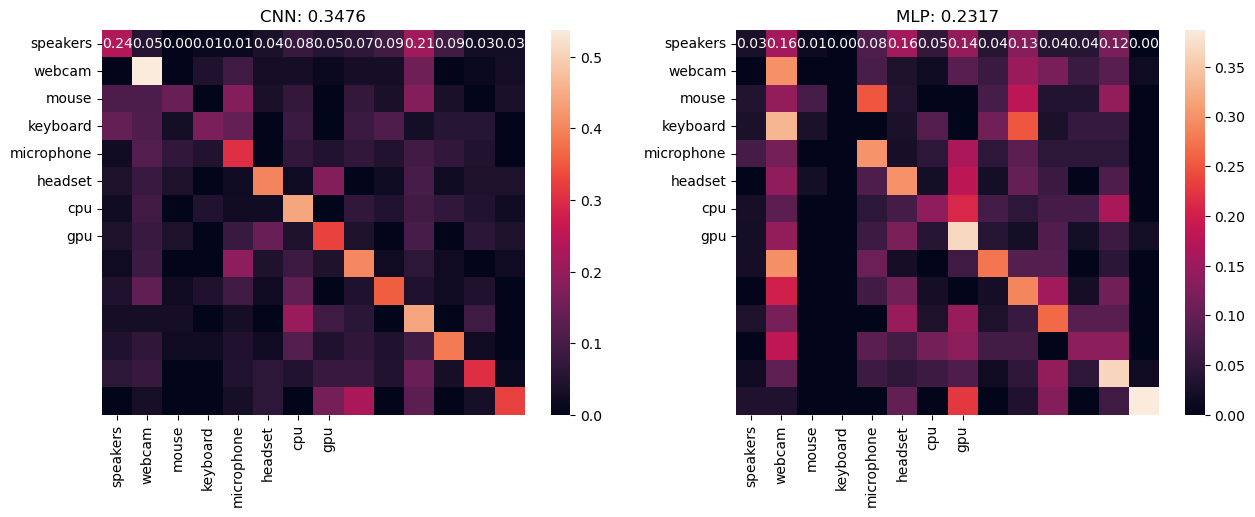

In [ ]:
%%time

# changes: 
#    1. Baseline: 2 conv layers and two output layers
cnn1 = Sequential()

num_filt_layers = [24, 24]
for num_filters in num_filt_layers:
    cnn1.add( Conv2D(filters=num_filters, 
                    kernel_size=(3,3), 
                    padding='same') )
    cnn1.add( Activation('relu'))
    cnn1.add( MaxPooling2D(pool_size=(2, 2), 
                           ) )
    

# add one layer on flattened output
cnn1.add( Flatten() )
cnn1.add( Dense(100, activation='relu') )
cnn1.add( Dense(100, activation='relu') )
cnn1.add( Dense(NUM_CLASSES, activation='softmax') )

# Let's train the model 
cnn1.compile(loss='mean_squared_error',
              optimizer='rmsprop',
              metrics=['accuracy'])

input_shape = [None, 28,28,1]
cnn1.build(input_shape)
print(cnn1.summary())

# we need to exapnd the dimensions here to give the 
#   "channels" dimension expected by Keras
cnn1.fit(X_train, y_train_ohe, 
        batch_size=32, epochs=50, 
        shuffle=True, verbose=1,
        validation_data=(X_test,y_test_ohe))

compare_mlp_cnn(cnn1,mlp,X_test,y_test,labels)

# this code below will be used to create different models

In [ ]:
%%time
# Copy TensorFlow Architecture from 
#   Deep MNIST for experts
#   https://www.tensorflow.org/versions/r0.11/tutorials/mnist/pros/index.html

# Manipulated to mirror parts of this network:
#   http://ankivil.com/mnist-database-and-simple-classification-networks/

cnn2 = Sequential()

num_filt_layers = [32, 64]
for num_filters in num_filt_layers:
    cnn2.add( Conv2D(filters=num_filters, 
                    kernel_size=(3,3), 
                    padding='same', 
                    activation='relu',
                    ) ) # more compact syntax

    # max pooling
    cnn2.add( MaxPooling2D(pool_size=(2, 2) ) )
    

# add one layer on flattened output
cnn2.add( Dropout(0.25) ) # add some dropout for regularization after conv layers
cnn2.add( Flatten() )
cnn2.add( Dense(256, activation='relu') )
cnn2.add( Dropout(0.5) ) # add some dropout for regularization, again!
cnn2.add( Dense(NUM_CLASSES, activation='softmax') )

# Let's train the model 
cnn2.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
              optimizer='rmsprop', # 'adadelta' 'rmsprop'
              metrics=['accuracy'])

input_shape = [None, 28,28,1]
cnn2.build(input_shape)
print(cnn2.summary())

history = cnn2.fit(X_train, y_train_ohe, 
            batch_size=128, epochs=30, 
            shuffle=True, verbose=1,
            validation_data=(X_test,y_test_ohe))



Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 256)            │       803,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 14)             │         3,598 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 825,486 (3.15 MB)

 Trainable params: 825,486 (3.15 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/30


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.1051 - loss: 2.6174 - val_accuracy: 0.1845 - val_loss: 2.5153
Epoch 2/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.1480 - loss: 2.5151 - val_accuracy: 0.1646 - val_loss: 2.4530
Epoch 3/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1891 - loss: 2.4338 - val_accuracy: 0.2241 - val_loss: 2.3830
Epoch 4/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.2229 - loss: 2.3523 - val_accuracy: 0.2424 - val_loss: 2.3255
Epoch 5/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.2524 - loss: 2.2712 - val_accuracy: 0.2317 - val_loss: 2.3598
Epoch 6/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.2814 - loss: 2.2253 - val_accuracy: 0.2851 - val_loss: 2.1946
Epoch 7/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3041 - loss: 2.1602 - val_accuracy: 0.2622 - val_loss: 2.2929
Epoch 8/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.3308 - loss: 2.0861 - val_accuracy: 0.2729 - val_loss: 2.

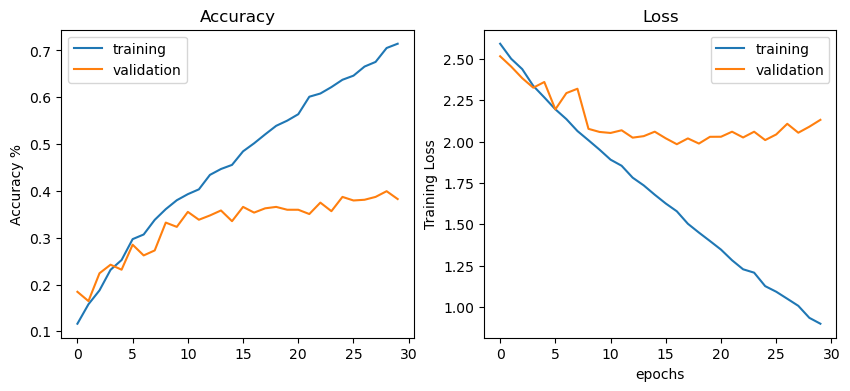

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='training')

plt.ylabel('Accuracy %')
plt.title('Training')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='training')
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('epochs')
plt.title('Loss')
plt.legend()
plt.show()

In [ ]:
%%time
# Copy TensorFlow Architecture from 
#   Deep MNIST for experts
#   https://www.tensorflow.org/versions/r0.11/tutorials/mnist/pros/index.html

# Manipulated to mirror parts of this network:
#   http://ankivil.com/mnist-database-and-simple-classification-networks/

cnn2 = Sequential()

num_filt_layers = [64, 128]
for num_filters in num_filt_layers:
    cnn2.add( Conv2D(filters=num_filters, 
                    kernel_size=(3,3), 
                    padding='same', 
                    activation='relu',
                    ) ) # more compact syntax

    # max pooling
    cnn2.add( MaxPooling2D(pool_size=(2, 2) ) )
    

# add one layer on flattened output
cnn2.add( Dropout(0.25) ) # add some dropout for regularization after conv layers
cnn2.add( Flatten() )
cnn2.add( Dense(256, activation='relu') )
cnn2.add( Dropout(0.5) ) # add some dropout for regularization, again!
cnn2.add( Dense(NUM_CLASSES, activation='softmax') )

# Let's train the model 
cnn2.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
              optimizer='rmsprop', # 'adadelta' 'rmsprop'
              metrics=['accuracy'])

input_shape = [None, 28,28,1]
cnn2.build(input_shape)
print(cnn2.summary())

history = cnn2.fit(X_train, y_train_ohe, 
            batch_size=128, epochs=50, 
            shuffle=True, verbose=1,
            validation_data=(X_test,y_test_ohe))



Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 256)            │     1,605,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 14)             │         3,598 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,683,982 (6.42 MB)

 Trainable params: 1,683,982 (6.42 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.0957 - loss: 2.6144 - val_accuracy: 0.1265 - val_loss: 2.5433
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.1310 - loss: 2.5321 - val_accuracy: 0.2058 - val_loss: 2.4401
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.1905 - loss: 2.4333 - val_accuracy: 0.2256 - val_loss: 2.3206
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.2481 - loss: 2.3264 - val_accuracy: 0.2744 - val_loss: 2.2653
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.2789 - loss: 2.2301 - val_accuracy: 0.2896 - val_loss: 2.2596
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.3074 - loss: 2.1645 - val_accuracy: 0.2546 - val_loss: 2.2115
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.3138 - loss: 2.0887 - val_accuracy: 0.3125 - val_loss: 2.1009
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.3557 - loss: 1.9725 - val_accuracy: 0.333

In [ ]:
import tensorflow as tf

if tf.test.gpu_device_name():
    print('GPU device found')
else:
    print('No GPU device found')


No GPU device found


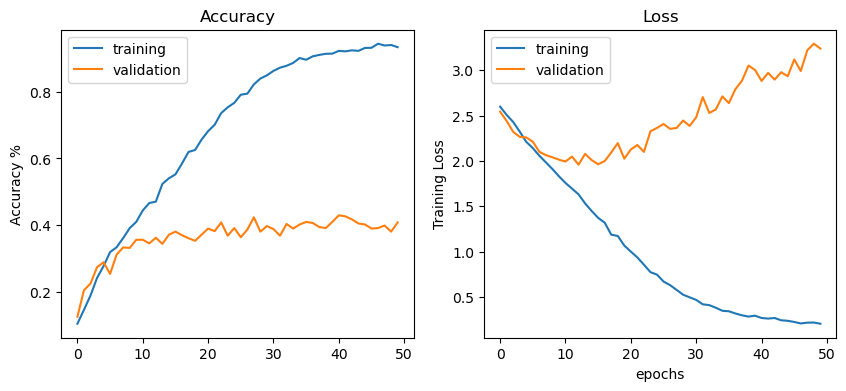

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='training')

plt.ylabel('Accuracy %')
plt.title('Training')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='training')
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('epochs')
plt.title('Loss')
plt.legend()
plt.show()

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step


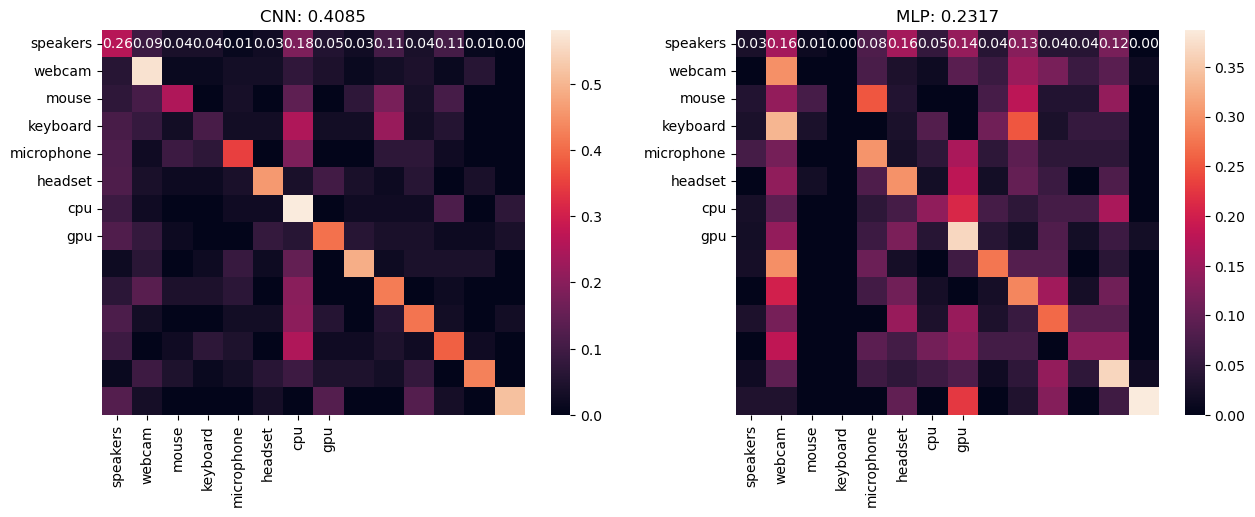

In [ ]:
compare_mlp_cnn(cnn2,mlp,X_test,y_test,labels)

In [ ]:
cnn2.evaluate(X_test,y_test_ohe,verbose=1)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4404 - loss: 3.1197


[3.2385945320129395, 0.4085365831851959]

In [ ]:
# want to save this model for later?
cnn2.save('large_data/model_cnn.h5')

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


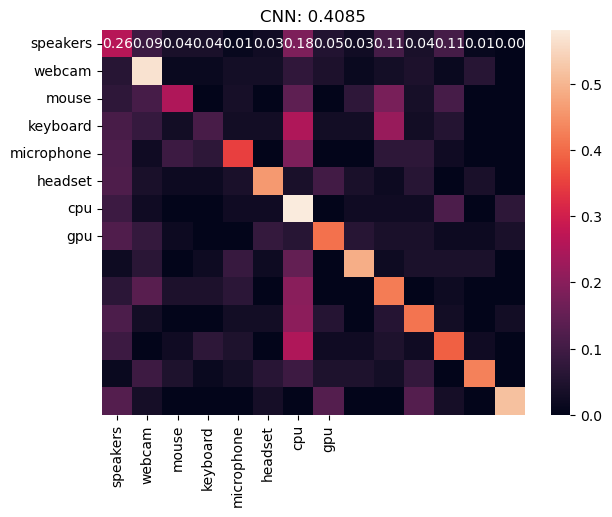

In [ ]:
from tensorflow.keras.models import load_model

cnn_mnist = load_model('large_data/model_cnn.h5')
compare_mlp_cnn(cnn_mnist,None,X_test,y_test,labels)

### Preparation (3 points total)  

[1.5 points] Choose and explain what metric(s) you will use to evaluate your algorithm’s performance. You should give a detailed argument for why this (these) metric(s) are appropriate on your data. That is, why is the metric appropriate for the task (e.g., in terms of the business case for the task). Please note: rarely is accuracy the best evaluation metric to use. Think deeply about an appropriate measure of performance.

[1.5 points] Choose the method you will use for dividing your data into training and testing (i.e., are you using Stratified 10-fold cross validation? Shuffle splits? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. Convince me that your cross validation method is a realistic mirroring of how an algorithm would be used in practice. 


### Modeling (6 points total)

[1.5 points]  Setup the training to use data expansion in Keras (also called data augmentation). Explain why the chosen data expansion techniques are appropriate for your dataset. You should make use of Keras augmentation layers, like in the class examples.

[2 points] Create a convolutional neural network to use on your data using Keras. Investigate at least two different convolutional network architectures and investigate changing one or more parameters of each architecture such as the number of filters. This means, at a  minimum, you will train a total of four models (2 different architectures, with 2 parameters changed in each architecture). Use the method of train/test splitting and evaluation metric that you argued for at the beginning of the lab. Visualize the performance of the training and validation sets per iteration (use the "history" parameter of Keras). Be sure that models converge. 

[1.5 points] Visualize the final results of all the CNNs and interpret/compare the performances. Use proper statistics as appropriate, especially for comparing models. 
[1 points] Compare the performance of your convolutional network to a standard multi-layer perceptron (MLP) using the receiver operating characteristic and area under the curve. Use proper statistical comparison techniques.  

### Exceptional Work (1 points total)

You have free reign to provide additional analyses. 
One idea (required for 7000 level students): Use transfer learning with pre-trained weights for your initial layers of your CNN. Compare the performance when using transfer learning to your best model from above in terms of classification performance. 


In [ ]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load pre-trained MobileNet model without the top layers
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully-connected layer
x = Dense(1024, activation='relu')(x)

# Add a logistic layer with the number of classes
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model (we won't update the weights during training)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Resize and convert images to RGB
X_train_rgb = np.array([cv2.cvtColor(cv2.resize(img.astype('float32'), (128, 128)), cv2.COLOR_GRAY2RGB) for img in X_train])
X_test_rgb = np.array([cv2.cvtColor(cv2.resize(img.astype('float32'), (128, 128)), cv2.COLOR_GRAY2RGB) for img in X_test])

# Now, you can use these RGB images to train your model
model.fit(X_train_rgb, y_train_ohe, epochs=10, validation_data=(X_test_rgb, y_test_ohe))

Epoch 1/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 11s 111ms/step - accuracy: 0.3039 - loss: 3.0756 - val_accuracy: 0.5076 - val_loss: 1.6071
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 8s 103ms/step - accuracy: 0.5559 - loss: 1.3980 - val_accuracy: 0.5015 - val_loss: 1.6043
Epoch 3/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - accuracy: 0.6915 - loss: 0.9496 - val_accuracy: 0.4619 - val_loss: 1.8337
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step - accuracy: 0.7858 - loss: 0.6841 - val_accuracy: 0.5168 - val_loss: 1.6659
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step - accuracy: 0.8263 - loss: 0.5684 - val_accuracy: 0.5213 - val_loss: 1.7120
Epoch 6/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - accuracy: 0.8761 - loss: 0.4287 - val_accuracy: 0.5366 - val_loss: 1.7289
Epoch 7/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 9s 113ms/step - accuracy: 0.9075 - loss: 0.3131 - val_accuracy: 0.5412 - val_loss: 1.8442
Epoch 8/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - accuracy: 0.9319 - loss: 0.2618 - val_accuracy: 

Epoch 1/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 10s 121ms/step - accuracy: 0.9470 - loss: 0.2254 - val_accuracy: 0.5213 - val_loss: 2.4019
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 10s 122ms/step - accuracy: 0.9534 - loss: 0.1963 - val_accuracy: 0.5412 - val_loss: 2.4741
Epoch 3/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - accuracy: 0.9560 - loss: 0.1862 - val_accuracy: 0.5274 - val_loss: 2.3911
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 10s 127ms/step - accuracy: 0.9518 - loss: 0.1964 - val_accuracy: 0.5473 - val_loss: 2.4847
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - accuracy: 0.9444 - loss: 0.1845 - val_accuracy: 0.5381 - val_loss: 2.5511
Epoch 6/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - accuracy: 0.9526 - loss: 0.2051 - val_accuracy: 0.5366 - val_loss: 2.5658
Epoch 7/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 10s 126ms/step - accuracy: 0.9422 - loss: 0.2369 - val_accuracy: 0.5564 - val_loss: 2.5762
Epoch 8/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 10s 127ms/step - accuracy: 0.9544 - loss: 0.1866 - val_accu

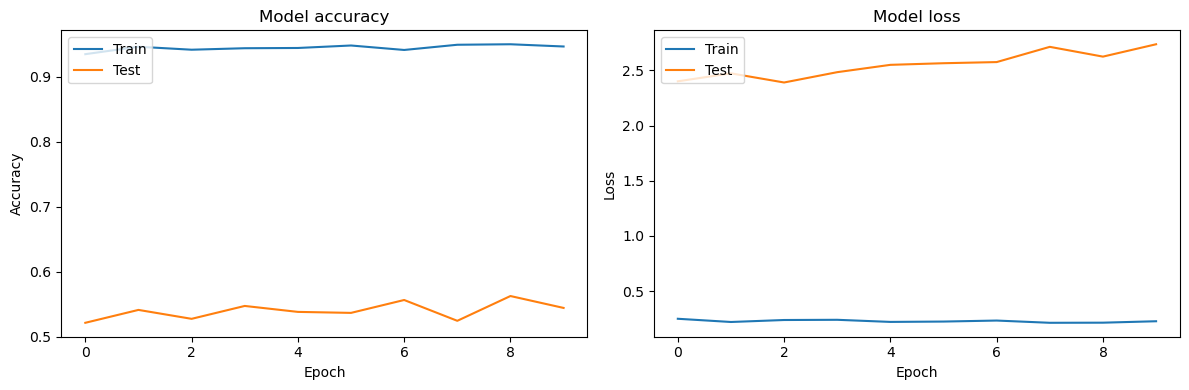

In [ ]:
import matplotlib.pyplot as plt

# Train the model and save the history
history = model.fit(X_train_rgb, y_train_ohe, epochs=10, validation_data=(X_test_rgb, y_test_ohe))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the classes for the test set with the first model
y_pred_1 = model_1.predict(X_test)
y_pred_1_classes = np.argmax(y_pred_1, axis=1)

# Predict the classes for the test set with the second model
y_pred_2 = model_2.predict(X_test_rgb)
y_pred_2_classes = np.argmax(y_pred_2, axis=1)

# Compute the confusion matrices
cm_1 = confusion_matrix(y_test, y_pred_1_classes)
cm_2 = confusion_matrix(y_test, y_pred_2_classes)

plt.figure(figsize=(12, 5))

# Plot the confusion matrix for the first model
plt.subplot(1, 2, 1)
sns.heatmap(cm_1, annot=True, fmt='d')
plt.title('Confusion matrix for the first model')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Plot the confusion matrix for the second model
plt.subplot(1, 2, 2)
sns.heatmap(cm_2, annot=True, fmt='d')
plt.title('Confusion matrix for the second model')
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.tight_layout()
plt.show()

NameError: name 'model_1' is not defined